<a href="https://colab.research.google.com/github/saharshhhh/DeepLearning/blob/main/Transfer_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

from tensorflow.keras.preprocessing.image import ImageDataGenerator

from keras.optimizers import Adam
from sklearn.metrics import classification_report,confusion_matrix
import tensorflow as tf

import cv2
import os
import numpy as np

In [ ]:
# import zipfile
# with zipfile.ZipFile('/content/drive/MyDRIVE            .zip', 'r') as zip_ref:
#   zip_ref.extractall('/content/drive/MyDrive/5_train')

In [ ]:
files_liat=os.listdir('/content/drive/MyDrive/5_train/train')
num_files=len(files_liat)
print(num_files)

25010


In [ ]:
import os, shutil,pathlib

original_dir=pathlib.Path(r"/content/drive/MyDrive/5_train/train")
new_base_dir=pathlib.Path(r"/content/drive/MyDrive/image_classifier")

def make_subset(subset_name, start_index, end_index):
  for category in ('cat','dog'):
    dir= new_base_dir/subset_name/category
    os.makedirs(dir)
    fnames=[f"{category}.{i}.jpg"for i in range(start_index, end_index)]
    for fname in fnames:
      shutil.copyfile(src=original_dir/fname,dst=dir/fname)

make_subset("train", start_index=0, end_index=1000)
make_subset("validation", start_index=1000, end_index=1500)
make_subset("test", start_index=1500, end_index=2500)

In [2]:
labels=['cat','dog']
img_size=224
def get_data(data_dir):
  images=[]
  image_labels=[]
  for label in labels:
    path=os.path.join(data_dir,label)
    class_num=labels.index(label)
    for img in os.listdir(path):
      try:
        img_arr=cv2.imread(os.path.join(path, img))[...,::-1]#BGR TO RGB
        resized_arr=cv2.resize(img_arr, (img_size, img_size))#RESIZE
        images.append(resized_arr)
        image_labels.append(class_num)
      except Exception as e:
        print(f"Error loading image {img}: {e}")
  return np.array(images), np.array(image_labels)

In [5]:
train_images, train_labels=get_data('/content/drive/MyDrive/image_classifier/train')
val_images, val_labels=get_data('/content/drive/MyDrive/image_classifier/validation')

In [6]:
train_images.shape

(2000, 224, 224, 3)

In [7]:
val_images.shape

(1000, 224, 224, 3)

In [8]:
X_train=np.array(train_images).astype('float32')/255
X_val=np.array(val_images).astype('float32')/255

In [9]:
y_train=np.array(train_labels)
y_val=np.array(val_labels)

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
train_datagen=ImageDataGenerator(rotation_range=20, zoom_range=0.2, horizontal_flip=True)
val_datagen=ImageDataGenerator()
train_generator=train_datagen.flow(X_train, y_train, batch_size=32)
val_generator=val_datagen.flow(X_val, y_val, batch_size=32)

In [13]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout

vgg_base=VGG16(weights='imagenet', include_top=False, input_shape=(224,224,3))
for layer in vgg_base.layers:
  layer.trainable=False
vg_model = Sequential()
vg_model.add(base_model)
vg_model.add(Flatten())
vg_model.add(Dense(128, activation='relu'))
vg_model.add(Dropout(0.2))
vg_model.add(Dense(64, activation='relu'))
vg_model.add(Dropout(0.2))
vg_model.add(Dense(32, activation='relu'))
vg_model.add(Dropout(0.2))
vg_model.add(Dense(1, activation='sigmoid'))


In [14]:
vg_model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [44]:
hist0=vg_model.fit(train_generator,validation_data=val_generator,epochs=10)

Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 38s 607ms/step - accuracy: 0.9756 - loss: 0.0721 - val_accuracy: 0.9670 - val_loss: 0.0700
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 38s 604ms/step - accuracy: 0.9888 - loss: 0.0366 - val_accuracy: 0.9360 - val_loss: 0.1364
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 43s 679ms/step - accuracy: 0.9670 - loss: 0.1019 - val_accuracy: 0.9650 - val_loss: 0.0871
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 38s 603ms/step - accuracy: 0.9753 - loss: 0.0746 - val_accuracy: 0.9590 - val_loss: 0.1077
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 38s 593ms/step - accuracy: 0.9913 - loss: 0.0346 - val_accuracy: 0.9500 - val_loss: 0.1397
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 38s 603ms/step - accuracy: 0.9806 - loss: 0.0542 - val_accuracy: 0.9580 - val_loss: 0.1011
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 38s 598ms/step - accuracy: 0.9808 - loss: 0.0518 - val_accuracy: 0.9730 - val_loss: 0.1110
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 41s 603ms/step - accuracy: 0.9756 - loss: 0.0642 - val_accu

In [45]:
vg_model.evaluate(X_train,y_train)

63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 166ms/step - accuracy: 0.9820 - loss: 0.0474


[0.04559263959527016, 0.9829999804496765]

In [46]:
vg_model.evaluate(X_val,y_val)

32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 166ms/step - accuracy: 0.9481 - loss: 0.1406


[0.16086260974407196, 0.9380000233650208]

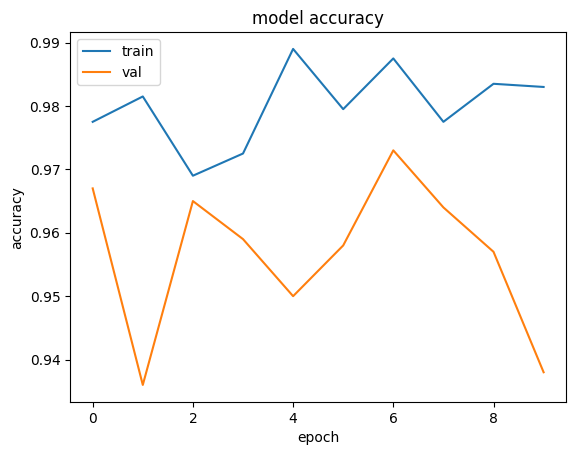

In [47]:
plt.plot(hist0.history['accuracy'])
plt.plot(hist0.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

In [21]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
# from tensorflow.keras.optimizers import Adam

In [31]:
reset_base=ResNet50(weights='imagenet',include_top=False, input_shape=(224,224,3))
for layer in reset_base.layers:
  layer.trainable=False
reset_model=Sequential()
reset_model.add(reset_base)
reset_model.add(GlobalAveragePooling2D())
reset_model.add(Dropout(0.1))
reset_model.add(Dense(256, activation='relu'))
reset_model.add(Dropout(0.1))
reset_model.add(Dense(128, activation='relu'))
reset_model.add(Dropout(0.1))
reset_model.add(Dense(1, activation='sigmoid'))


In [32]:
reset_model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,145,281 (92.11 MB)

 Trainable params: 557,569 (2.13 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [33]:
reset_model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])


In [42]:
hist1=reset_model.fit(train_generator,validation_data=val_generator,epochs=10)

Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 29s 455ms/step - accuracy: 0.5937 - loss: 0.6761 - val_accuracy: 0.6220 - val_loss: 0.6487
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 26s 409ms/step - accuracy: 0.6035 - loss: 0.6682 - val_accuracy: 0.6250 - val_loss: 0.6451
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 26s 409ms/step - accuracy: 0.5844 - loss: 0.6706 - val_accuracy: 0.6270 - val_loss: 0.6438
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 28s 446ms/step - accuracy: 0.6261 - loss: 0.6560 - val_accuracy: 0.6290 - val_loss: 0.6414
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 30s 485ms/step - accuracy: 0.5922 - loss: 0.6717 - val_accuracy: 0.6310 - val_loss: 0.6410
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 27s 425ms/step - accuracy: 0.5892 - loss: 0.6611 - val_accuracy: 0.6170 - val_loss: 0.6454
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 28s 448ms/step - accuracy: 0.5992 - loss: 0.6663 - val_accuracy: 0.6270 - val_loss: 0.6404
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 26s 412ms/step - accuracy: 0.5992 - loss: 0.6644 - val_accu

In [29]:
reset_model.evaluate(X_train,y_train)

63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 103ms/step - accuracy: 0.1655 - loss: 0.7342


[0.6844187378883362, 0.5]

In [30]:
reset_model.evaluate(X_val,y_val)

32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 78ms/step - accuracy: 0.1794 - loss: 0.7331


[0.6829476356506348, 0.5]

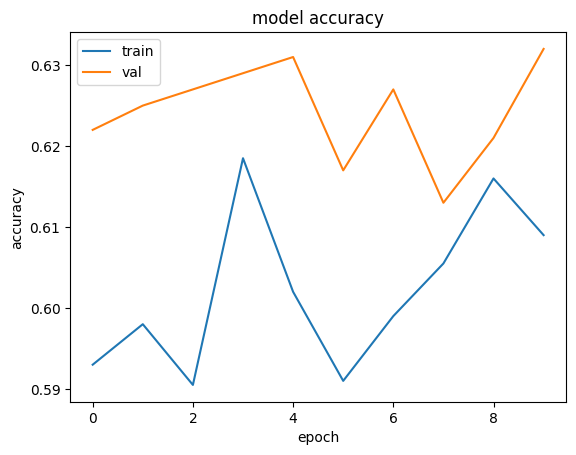

In [43]:
plt.plot(hist1.history['accuracy'])
plt.plot(hist1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

In [35]:
from ast import Global
from tensorflow.keras.applications import MobileNetV2

mobilenet_base=MobileNetV2(weights='imagenet', include_top=False, input_shape=(224,224,3))
for layer in mobilenet_base.layers:
  layer.trainable=False
mobilenet_model=Sequential()
mobilenet_model.add(mobilenet_base)
mobilenet_model.add(GlobalAveragePooling2D())
mobilenet_model.add(Dense(256, activation='relu'))
mobilenet_model.add(Dropout(0.1))
mobilenet_model.add(Dense(128, activation='relu'))
mobilenet_model.add(Dropout(0.1))
mobilenet_model.add(Dense(64, activation='relu'))
mobilenet_model.add(Dropout(0.1))
mobilenet_model.add(Dense(32, activation='relu'))
mobilenet_model.add(Dropout(0.1))
mobilenet_model.add(Dense(1, activation='sigmoid'))
mobilenet_model.summary()

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_3      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 256)            │       327,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,629,185 (10.03 MB)

 Trainable params: 371,201 (1.42 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [37]:
mobilenet_model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
hist=mobilenet_model.fit(train_generator,validation_data=val_generator,epochs=10)

Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 47s 565ms/step - accuracy: 0.8735 - loss: 0.2720 - val_accuracy: 0.9800 - val_loss: 0.0496
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 22s 349ms/step - accuracy: 0.9768 - loss: 0.0691 - val_accuracy: 0.9750 - val_loss: 0.0653
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 42s 362ms/step - accuracy: 0.9618 - loss: 0.0891 - val_accuracy: 0.9730 - val_loss: 0.0594
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 21s 338ms/step - accuracy: 0.9801 - loss: 0.0500 - val_accuracy: 0.9760 - val_loss: 0.0535
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 23s 366ms/step - accuracy: 0.9797 - loss: 0.0573 - val_accuracy: 0.9840 - val_loss: 0.0436
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 23s 369ms/step - accuracy: 0.9780 - loss: 0.0578 - val_accuracy: 0.9740 - val_loss: 0.0785
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 25s 393ms/step - accuracy: 0.9797 - loss: 0.0554 - val_accuracy: 0.9760 - val_loss: 0.0673
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 22s 355ms/step - accuracy: 0.9847 - loss: 0.0377 - val_accu

In [39]:
mobilenet_model.evaluate(X_train,y_train)

63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step - accuracy: 0.9936 - loss: 0.0291


[0.015216988511383533, 0.996999979019165]

In [40]:
mobilenet_model.evaluate(X_val,y_val)

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9778 - loss: 0.0749


[0.058731719851493835, 0.9819999933242798]

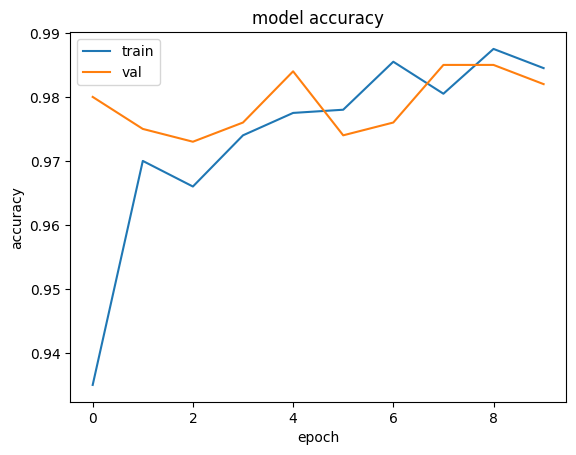

In [38]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

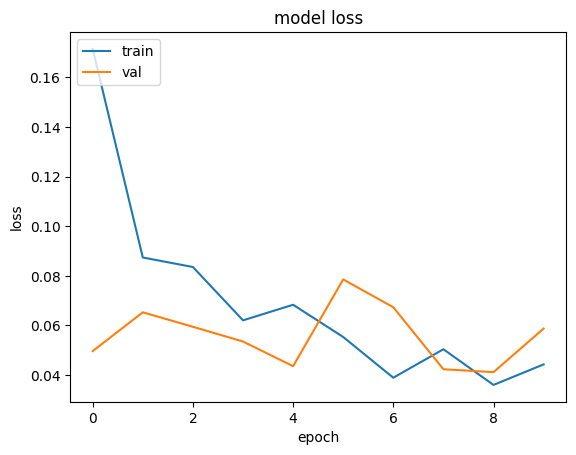

In [41]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')